In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [107]:
df = pd.read_csv('Antiviral_one_hot_exploring_42.csv')
df.sort_values(by='F1_cv', inplace=True, ascending=False)
df

,algorithm,fit_time,score_time,F1_cv,recall_cv,precision_cv,accuracy_cv,accuracy_val,precision_val,recall_val,f1_val,matthews_corrcoef_val,sensitivity,specificity
0,Ridge,0.140613,0.020558,0.840556,0.847847,0.843111,0.847847,0.843612,0.851046,0.843612,0.829323,0.641742,0.678162,0.844824
16,GradientBoosting,2.686703,0.012164,0.833488,0.840685,0.835592,0.840685,0.843612,0.847944,0.843612,0.829561,0.641787,0.678162,0.844964
1,Logistic,0.280717,0.021273,0.822940,0.830761,0.824706,0.830761,0.828194,0.829600,0.828194,0.814231,0.603034,0.665027,0.835651
19,LGBM,0.520518,0.009197,0.818851,0.824142,0.817890,0.824142,0.823789,0.822354,0.823789,0.810695,0.593243,0.665774,0.835409
17,HistGradientBoosting,14.019965,0.025829,0.818410,0.823594,0.817694,0.823594,0.814978,0.812535,0.814978,0.803077,0.574507,0.664405,0.833290
6,SVC,1.369931,0.406828,0.812047,0.832950,0.842026,0.832950,0.825991,0.850270,0.825991,0.802309,0.601581,0.619380,0.815106
5,LinearSVC,0.129597,0.013522,0.809539,0.814228,0.809565,0.814228,0.828194,0.828302,0.828194,0.814328,0.603082,0.665027,0.835721
4,QDA,0.437546,0.039190,0.802137,0.813101,0.805368,0.813101,0.797357,0.799084,0.797357,0.781171,0.530960,0.602148,0.827604
14,Bagging,0.200762,0.019677,0.801236,0.803192,0.801251,0.803192,0.781938,0.772765,0.781938,0.774275,0.511237,0.651395,0.821865
2,SGD,0.415075,0.012425,0.795750,0.801551,0.796437,0.801551,0.819383,0.819241,0.819383,0.806139,0.582324,0.660795,0.832037


/tmp/ipykernel_86593/923966521.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  model_colors = plt.cm.get_cmap('tab20', len(df.index))  # Colores para los modelos


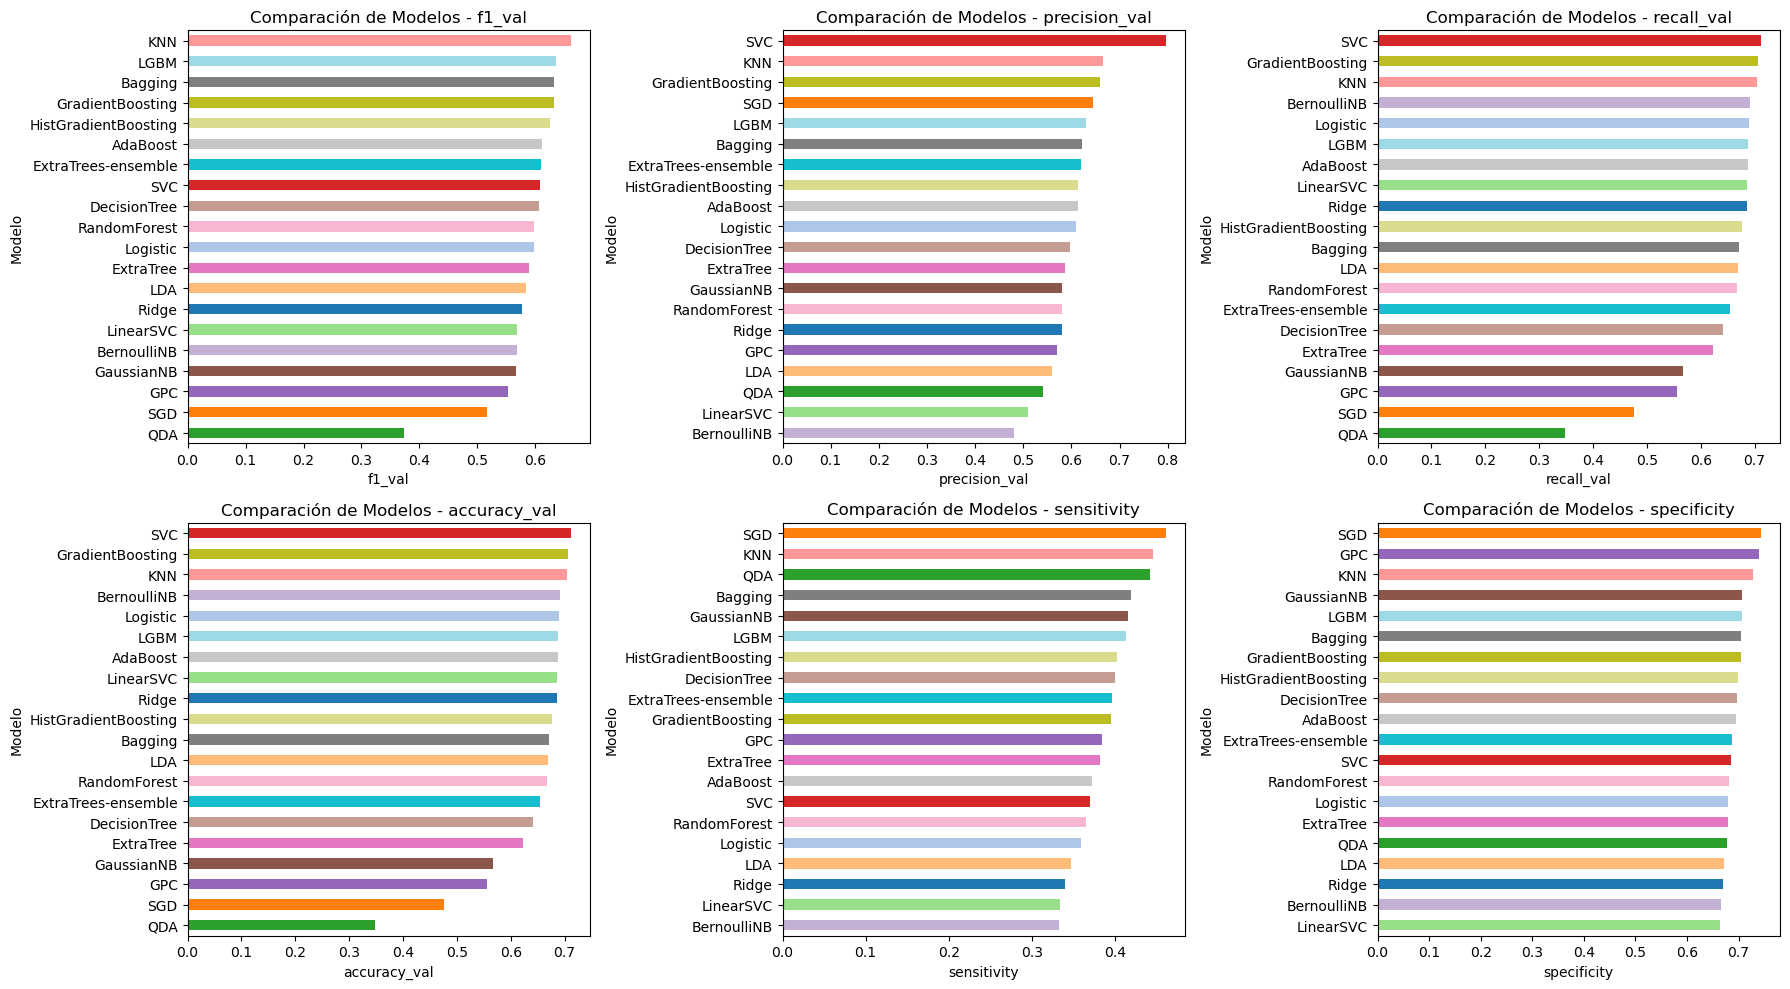

In [99]:
df.set_index('algorithm', inplace=True)

# Definir las métricas a comparar
metrics = ['f1_val', 'precision_val', 'recall_val', 'accuracy_val', 'sensitivity', 'specificity']

# Crear una figura con subgráficos
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
# Asignar un color específico para cada modelo
model_colors = plt.cm.get_cmap('tab20', len(df.index))  # Colores para los modelos

# Crear un diccionario que asigne un color fijo a cada modelo, basado en su índice
color_map = {model: model_colors(i) for i, model in enumerate(df.index)}

# Crear un gráfico para cada métrica
for i, metric in enumerate(metrics):
    ax = axes[i // 3, i % 3]

    # Ordenar los valores para que coincidan con el orden de los modelos
    sorted_df = df[metric].sort_values()

    # Asignar los colores de los modelos de acuerdo con el color_map, respetando el orden de los modelos
    colors = [color_map[model] for model in sorted_df.index]
    
    # Graficar con los colores fijos
    sorted_df.plot(kind='barh', ax=ax, color=colors)
    
    ax.set_title(f'Comparación de Modelos - {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Modelo')

# Ajustar y mostrar la imagen
plt.tight_layout()
plt.savefig('Antiviral_fft_exploring_42.png')
plt.show()